# HW Set 9 - Random Stuff
## Due April 16, 2020

### Name:   Paul Biswas

#### Note: If a problem asks you to work things out for different initial conditions or timesteps, please first do your first choice in one cell, then copy your code with the new inputs into a new cell, etc.  Try to end up with a notebook that would be a complete solution if printed out.

---


**Problem 1: Rejection Method**

Use the rejection method to generate a sequence of random numbers distributed according to $P_y(y) = \alpha e^{-\beta y}$.  Make a 10-bin histogram of the resulting distribution for $N=1000$ draws from the distribution, and a 100-bin histogram of the resulting distribution for $N=10^6$ draws from the distribution.  Plot the analytical curve over both. Here's a simple code to demonstrate how to plot a histogram:

    import matplotlib.pyplot as plt
    import numpy as np
    x = np.random.randn(500)
    width = 0.5
    histmin = np.floor(min(x))
    histmax = np.ceil(max(x))+width
    bins = np.arange(histmin,histmax,width)
    plt.hist(x,bins=bins)
    plt.show()


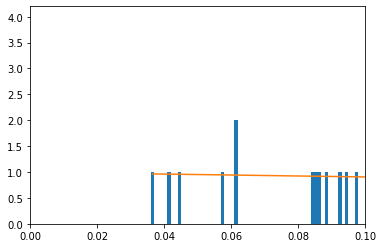

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def P(y):
    return np.exp(-y)
N = 1000
x = np.random.randn(N)
x = P(x)
width = 1/N
histmin = np.floor(min(x))
histmax = np.ceil(max(x))+width
bins = np.arange(histmin,histmax,width)
plt.hist(x,bins=bins)
y = np.sort(x)
plt.plot(y,P(y))
plt.xlim(0,0.1)
plt.show()

---
**Problem 2: Hypersphere volume**

Newman problem 10.7, but give volumes for spheres of 'radius = 1' and dimensionality 1-10 (e.g., for 1D, 'V' = 2, for 2D, V = $\pi$ (area), etc.)

In [ ]:
from numpy.random import random
from numpy import zeros,sqrt,arange

N = 1000000
dim = arange(1,11,1)

def f(x):

    r2 = zeros(x.shape[1],float)

    for xi in x:
        r2 += xi**2
    
    return r2<1
for i in dim:
    x = random((dim[i],N))*2 - 1

    fx = f(x)
    I = 2**dim[i]/N * sum(fx)

    var = sum(fx**2)/N-(sum(fx)/N)**2 
    sigma = 2**dim[i]*sqrt(var/N)
    print('For dimension {}, I = {} + {}'.format(dim[i],I,sigma))

---
**Problem 3: Random Walk in 2D**

Simulate a random walk in 2D for $N_{\rm walkers}$ each stepping $N_{\rm steps}$.   Start all walkers at the origin of your coordinate system, and plot the positions of all particles at 5 times sampled from your steps (0, $N_{\rm steps}/4$, $N_{\rm steps}/2$ $N_{\rm steps}*3/4$, $N_{\rm steps}-1$).

In [ ]:
# Plot a random walk
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

N_walkers = 100
N_steps = 100
def random_walk(N_steps):
    X,Y = [],[]
    x,y = 0,0

    for i in range(N_steps):
        (dx, dy) = random.choice([(0,1),(1,0),(0,-1),(-1,0)])
        x += dx
        y += dy
        X.append(x)
        Y.append(y)
    return(X,Y)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
             xlim=(-50, 50), ylim=(-50, 50))
for i in range(N_walkers):
    X,Y = random_walk(N_steps)
    plt.plot(X[0],Y[0])
    plt.plot(X[int(N_steps/4)],Y[int(N_steps/4)],'bo')
    plt.plot(X[int(N_steps/2)],Y[int(N_steps/2)],'bo')
    plt.plot(X[int(3*N_steps/4)],Y[int(3*N_steps/4)],'bo')
    plt.plot(X[int(N_steps/4-1)],Y[int(N_steps/4-1)],'bo')

#def animate(i):
#    point.set_data(X[i],Y[i])
#ani = animation.FuncAnimation(fig,animate)
plt.show()


---
**Problem 4: Entropy**

Extend Problem 3 to now calculate the entropy of the distribution as a function of time, as we discussed in class.  Here, you should plot only the final particle distribution and the entropy curve at the end of the calculation.  You may stop your time stepping when your first particle reaches the boundary of your calculation domain.  I suggest you use either 9 or 25 ancillary grid cells.

---
**Problem 5: Entropy 2**

Modify the code from Problem 3 so that particles cannot leave the computational domain.  For example, if a particle tries to step left past index $ix =0$ force it to step right instead, and similarly for the other boundaries.  Run the calculation until the entropy versus time curve flattens out.  Plot the final particle distribution and the entropy curve.

---
**Problem 6: Random Walk in 3D**

Simulate a random walk in 3D allowing the walker to make steps of unit length in random directions - don't restrict the walkers to sites on a discrete lattice.  Show that the motion is diffusive, that is $<r^2> = Dt$.  Find the value of $D$.  Note that to get a uniform distribution of angles, you will actually want to draw 3 values of $x$, $y$, and $z$, and then renormalize so the length of the displacement vector is 1.0.   Think about and explain why you cannot simply draw from random distributions of $(1.0,\theta,\phi)$ and get a uniform distribution of directions.

---
**Problem 7: Diffusion Limited Aggregation**

Write a code that simulates diffusion limited aggregation in 2D, as discussed in class, and prints out the dimmensionality of the resulting cluster.  Plot the final state of the cluster.  As discussed in class, put a seed particle in you computational domain.  Start particles on a circle of radius $R_{\rm start}$ that is $\sim$3-5 units bigger than the cluster size.  If a particle wanders out past 1.5 $R_{\rm start}$, kill it and restart a new random particle on the circle.  

For calculating the radius of the cluster a useful NumPy routine is "nonzero()" which returns the indices of the array that store values that are not zero.  So for example

    x,y = np.nonzero(c)

returns the $x,y$ arrays of non-zero elements in array $c$.  You can then use these to calculate $r_{\rm max}$, and then add 3-5 to get $R_{\rm start}$.

---
**Problem 8: DLA 2**
Write a code that generates a DLA structure using an initial "seed" which is the entire $x$ axis, e.g.,

    c = np.zeros([n,n],dtype=int)
    c[:,0] = 1
    
Then you'll start your walkers on a line that is $\sim$ 3-5 units higher than the maximum occupied $y$ value.  The resulting structure has been used to model the paths followed by electric discharges in a gas (e.g., lightning bolts).

---
**Problem 9: Percolation**

Generate a spanning cluster for a two-demensional square lattice at $p = p_c$ using the code from the 'dragly' blog.  Estimate the fractal dimensionality of the cluster.  You should find a value of $d_f$ which is slightly smaller than 2 (the expected value is $\sim$1.9).